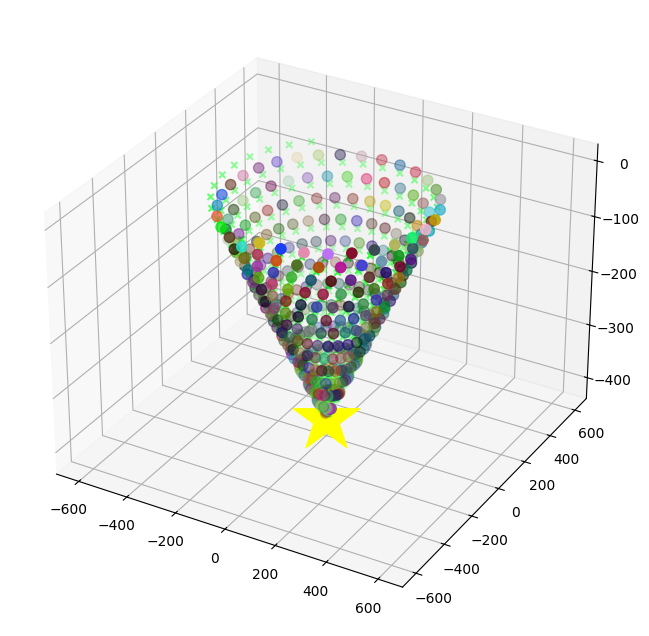

In [12]:
import math
import random
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# Экспериментируйте!
random.seed(2025)

CLR_0 = '#22ff33'
MARKER_1 = 'x'
MARKER_2 = 'o'

K = 400
XLIM = 666
YLIM = 666
STEP = 1

STAR_COLOR = '#FFFF00'  # Цвет звезды
STAR_MARKER = '*'      # Форма маркера для звезды
STAR_SIZE = 2500
star_scatter = None

def init():
    global star_scatter
    k=K
    Z = [-i for i in range(k)]
    X = [math.cos(i/3)*(k-i+5) for i in range(k)]
    Y = [math.sin(i/3)*(k-i+5) for i in range(k)]
    ax.scatter(X,Y,Z, c=CLR_0, marker=MARKER_1)
    step = STEP
    clr = [(abs(random.random()-i/k),abs(random.random()-i/k),abs(random.random()-i/k)) for i in range(1,k,step)]
    Z = [-i for i in range(1,k,step)]
    X = [math.cos(i/3+3)*(k-i+5) for i in range(1,k,step)]
    Y = [math.sin(i/3+3)*(k-i+5) for i in range(1,k,step)]
    ax.scatter(X,Y,Z, c=clr, marker=MARKER_2,s=55)

    star_x = 0 # Пусть звезда вращается вокруг 0 по оси x
    star_y = 0  #  Пусть звезда вращается вокруг 0 по оси y
    star_z = -400  # Начальная z-координата для звезды

    star_scatter = ax.scatter(star_x, star_y, star_z, c=STAR_COLOR, marker=STAR_MARKER, s=STAR_SIZE) #создаем начальную звезду

    plt.xlim(-XLIM, XLIM)
    plt.ylim(-YLIM, YLIM)
    return fig,

def animate(f):
    global star_scatter
    fig.clear()
    ax = fig.add_subplot(111, projection="3d")
    k=K
    Z = [-i for i in range(k)]
    X = [math.cos(i/5+f/40)*(k-i+5) for i in range(k)]
    Y = [math.sin(i/5+f/40)*(k-i+5) for i in range(k)]
    ax.scatter(X,Y,Z, c=CLR_0, marker=MARKER_1)
    step = STEP
    clr = [(abs(random.random()-i/k),abs(random.random()-i/k),abs(random.random()-i/k)) for i in range(1,k,step)]
    Z = [-i for i in range(1,k,step)]
    X = [math.cos(i/5+f/20)*(k-i+5) for i in range(1,k,step)]
    Y = [math.sin(i/5+f/20)*(k-i+5) for i in range(1,k,step)]
    ax.scatter(X,Y,Z, c=clr, marker=MARKER_2,s=55)

    star_x = math.cos(f / 10) * 5 # создаем вращение звезды вокруг оси Z
    star_y = math.sin(f / 10) * 5 #  создаем вращение звезды вокруг оси Z
    star_z = -400

    if star_scatter:  # Если звезда уже была создана (после первого кадра анимации)
      star_scatter.remove() # удаляем старое положение звезды
    star_scatter = ax.scatter(star_x, star_y, star_z - 10, c=STAR_COLOR, marker=STAR_MARKER, s=STAR_SIZE)

    plt.xlim(-XLIM,XLIM)
    plt.ylim(-YLIM,YLIM)
    return fig,

ani=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=False)

gif_writer = animation.PillowWriter(fps=30)

ani.save('filename.gif',writer=gif_writer)
